In [9]:
from forwardThinking.datasets import load_mnist
from forwardThinking.models import PassForwardThinking, ForwardThinking, DNN

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
import urllib2
#HTML(urllib2.urlopen('http://seanwade.com/jupyter_4.css').read())

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def plot_acc_loss(acc, loss):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.title('Accuracy')
    plt.plot(acc)
    plt.subplot(122)
    plt.title('Loss')
    plt.plot(loss)
    plt.tight_layout()
    plt.show()

In [12]:
x_train, y_train, x_test, y_test = load_mnist()

## DNN

In [5]:
dnn = DNN([784, 100, 50, 10])
dnn.fit(x_train, y_train, epochs=30, verbose=False)
summary = dnn.summary()

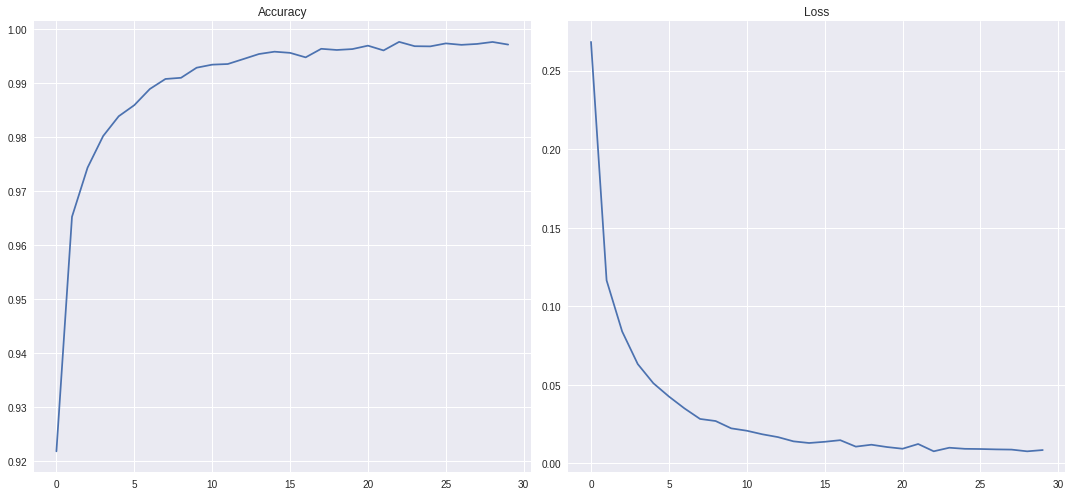

In [6]:
plot_acc_loss(dnn.history.history['acc'], dnn.history.history['loss'])

## Forward Thinking

In [7]:
forward = ForwardThinking([784, 100, 50, 10])
forward.fit(x_train, y_train, epochs=10, verbose=False)
summary = forward.summary()

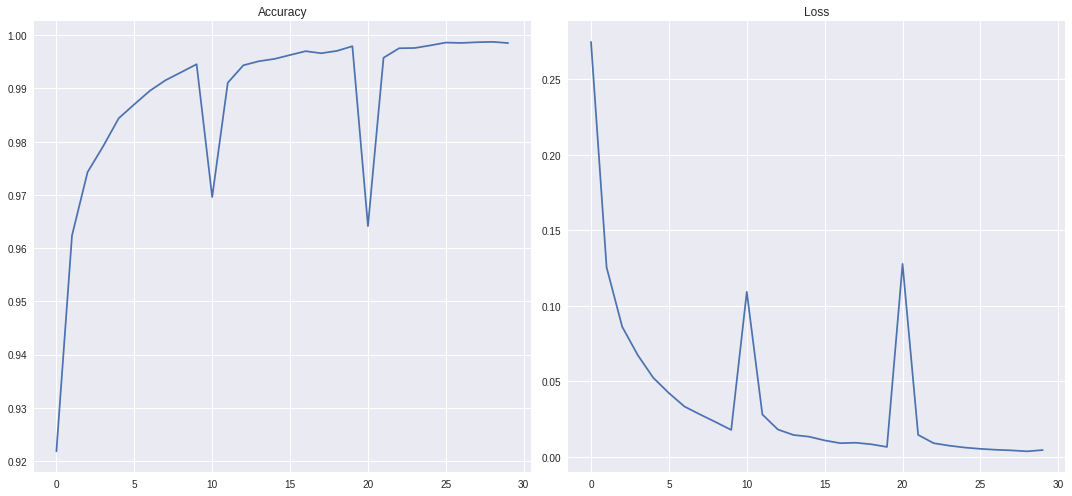

In [8]:
plot_acc_loss(forward.training_history(), forward.training_loss())

## Pass Forward Thinking

In [13]:
passForward = PassForwardThinking([784, 100, 50, 10])
passForward.fit(x_train, y_train, epochs=15, verbose=False)

In [ ]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'])

In [6]:
passForwardFreeze = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForwardFreeze.fit(x_train, y_train, epochs=30, verbose=False)

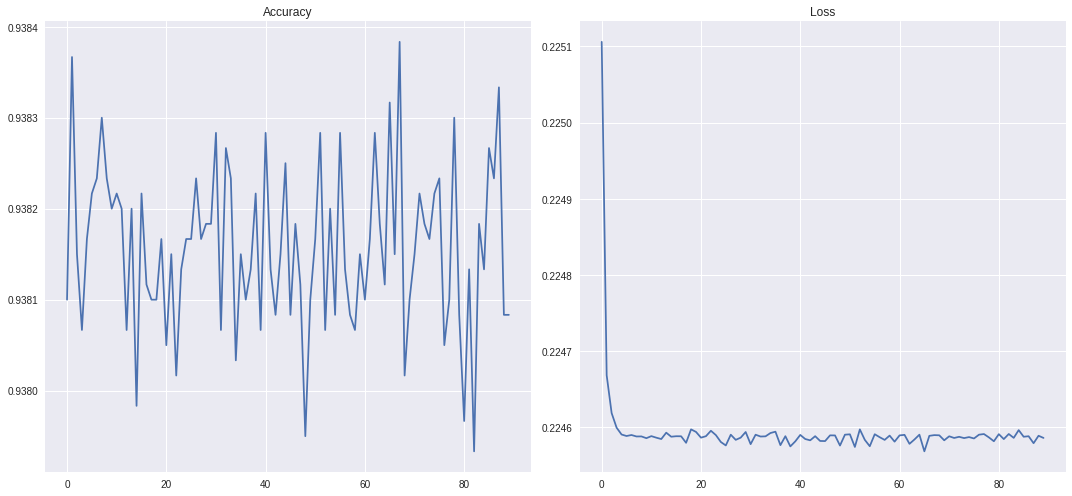

In [7]:
plot_acc_loss(passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'])